In [1]:
"""
We generate the toy dataset by generating 100 values equidistantly between -1 and 1 as the input variable (x).
We generate the output variable (y) based on y = 2+x+2x^2+e, where e~N(0,0.1) is noise
(random variation) from a normal distribution with 0 mean and 0.1 being the standard deviation. 
"""
# Generate toy dataset
import pylab
import numpy as np

In [14]:
x = np.linspace(-1,1,100)
signal = 2+x+2*x*x
noise = np.random.normal(0,0.1,100)

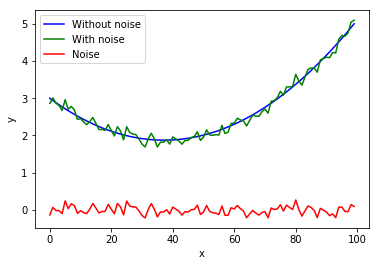

In [15]:
y = signal + noise
pylab.plot(signal,'b')
pylab.plot(y,'g')
pylab.plot(noise,'r')
pylab.xlabel("x")
pylab.ylabel("y")
pylab.legend(["Without noise","With noise","Noise"],loc=2)

In [43]:
x_train = x[0:80]
y_train = y[0:80]

In [51]:
def generateOutputs(x,y,x_train,y_train,degree):
    # Model with degree 1
    pylab.figure()
    x_train = np.column_stack([np.power(x_train,i) for i in range(0,degree)])
    model = np.dot(np.dot(np.linalg.inv(
        np.dot(x_train.transpose(),x_train)),
                          x_train.transpose()),
                   y_train)
    pylab.plot(x,y,"g")
    pylab.xlabel("x")
    pylab.ylabel("y")
    predicted = np.dot(model, [np.power(x,i) for i in range(0,degree)])

    pylab.plot(x,predicted,'r')
    pylab.legend(["Actual","Predicted"],loc=2)
    pylab.title("Degree = {}".format(degree))
    train_rmse1 = np.sqrt(np.sum(np.dot(y[0:80]-predicted[0:80],y_train-predicted[0:80])))
    test_rmse1 = np.sqrt(np.sum(np.dot(y[80:]-predicted[80:],y[80:]-predicted[80:])))

    print("Train RMSE (degree = {}) ={:.4}".format(degree,train_rmse1))
    print("Test RMSE (degree = {}) ={:.4}".format(degree,test_rmse1))

Train RMSE (degree = 1) =3.761
Test RMSE (degree = 1) =8.476
Train RMSE (degree = 2) =3.7
Test RMSE (degree = 2) =7.754
Train RMSE (degree = 3) =0.924
Test RMSE (degree = 3) =0.5405
Train RMSE (degree = 4) =0.9027
Test RMSE (degree = 4) =1.138
Train RMSE (degree = 5) =0.9024
Test RMSE (degree = 5) =1.364
Train RMSE (degree = 6) =0.8949
Test RMSE (degree = 6) =4.144
Train RMSE (degree = 7) =0.8946
Test RMSE (degree = 7) =5.493
Train RMSE (degree = 8) =0.8943
Test RMSE (degree = 8) =8.906
Train RMSE (degree = 9) =0.8614
Test RMSE (degree = 9) =77.62
Train RMSE (degree = 10) =0.8614
Test RMSE (degree = 10) =78.39
Train RMSE (degree = 11) =0.8592
Test RMSE (degree = 11) =217.9
Train RMSE (degree = 12) =0.8486
Test RMSE (degree = 12) =977.7
Train RMSE (degree = 13) =0.8454
Test RMSE (degree = 13) =98.02
Train RMSE (degree = 14) =0.8396
Test RMSE (degree = 14) =3.731e+03
Train RMSE (degree = 15) =0.8396
Test RMSE (degree = 15) =4.675e+03
Train RMSE (degree = 16) =0.8392
Test RMSE (degree = 1

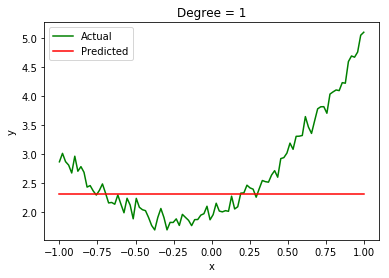

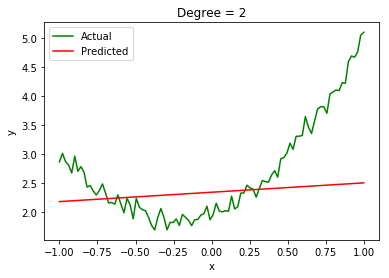

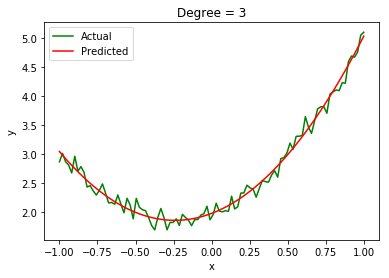

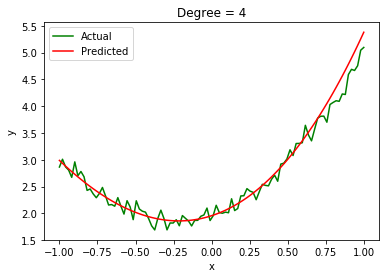

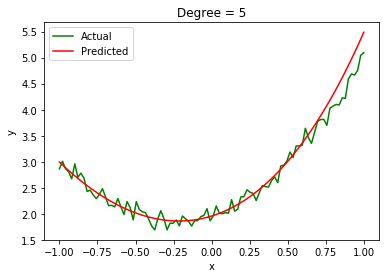

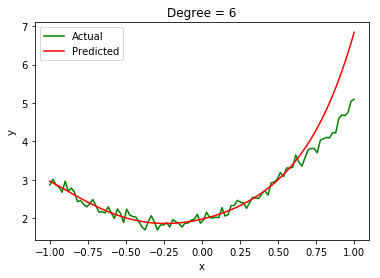

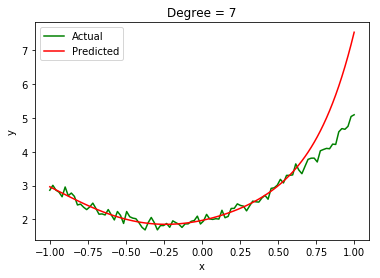

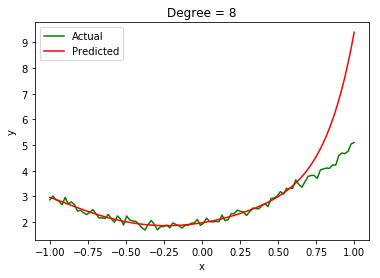

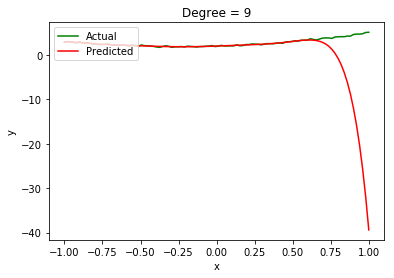

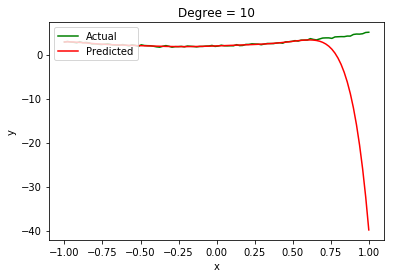

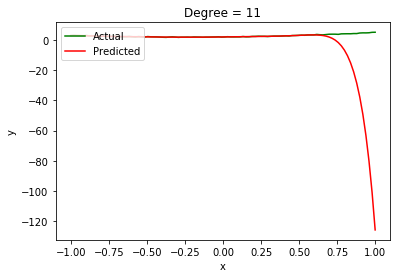

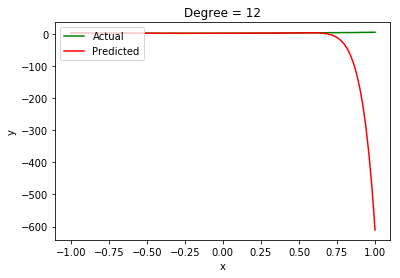

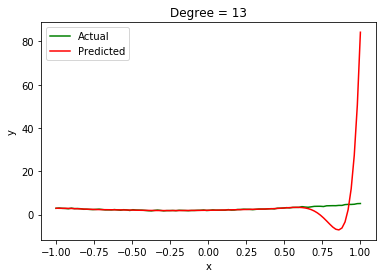

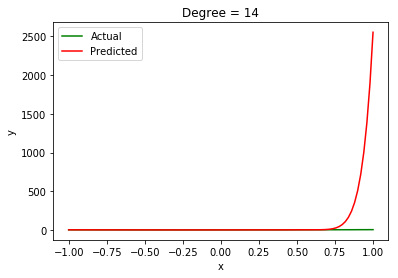

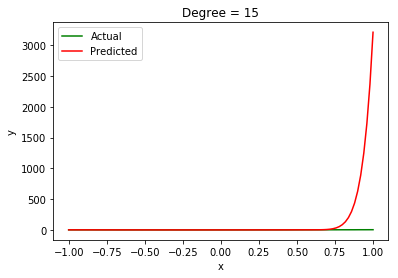

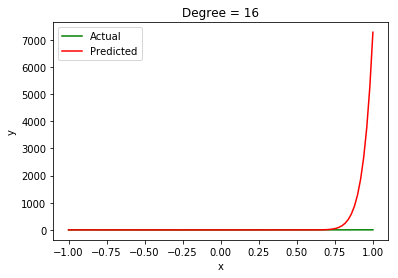

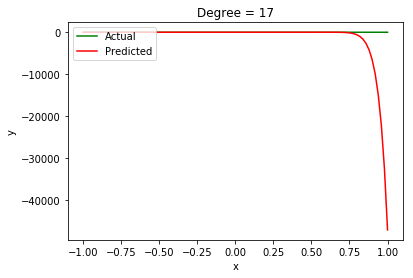

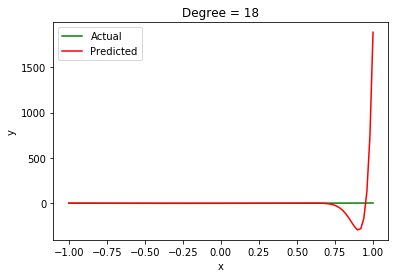

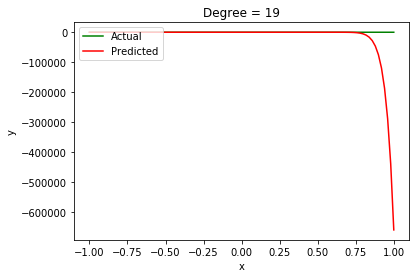

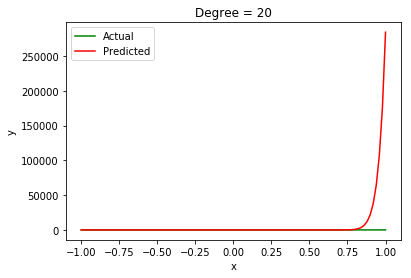

In [52]:
for degree in range(1,21):
    generateOutputs(x,y,x_train,y_train,degree)